In [4]:
import re
import os, sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from io import StringIO
# change the font size and tick pad
plt.rc('mathtext', fontset='stixsans')

plt.rcParams['xtick.major.pad'] = 4
plt.rcParams['ytick.major.pad'] = 4

plt.rcParams.update({'font.size' : 30})
font = {'fontsize'   : 35}
font1 = {'fontsize'   : 30}

In [5]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/andres2085/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
#data = np.genfromtxt('/home/andres2085/Downloads/w200901ms_2h2d.txt', dtype=None)

In [7]:
data ='/home/andres2085/Downloads/w200901ms_2h2d.txt'

In [8]:
#pd.read_table('myCSV_01.csv')

In [9]:
#pd.read_table('/home/andres2085/Downloads/ch05_06.txt',sep=',',skiprows=[0,1,3,6])

In [10]:
#parsed = pd.read_csv('/home/andres2085/Downloads/csv_mindex.txt', index_col=['key1', 'key2','value1', 'value2'])
#parsed

In [25]:
#names=['k','height', 'times','zonalW','meriW','p']
parsed = pd.read_table('/home/andres2085/Downloads/w200901ms_2h2d.txt',lineterminator='=',
                    sep=None, delimiter='\s+', skiprows=2, skipinitialspace=False, 
                     skip_blank_lines=True,
                    squeeze=True,header=None)#, index_col=['a','b','0','d','e'])
parsed#.head()
#parsed.info()
#for chunk in psed:
#    print(chunk)

,0,1,2,3,4,5,6,7,8,9,...,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175
0,1,82.0,uv\r\n,times,1.0,3.0,5.0,7.0,9.0,11.0,...,50,45,41,41,39,48,51,55,"k,",ht
1,2,85.0,uv\r\n,times,1.0,3.0,5.0,7.0,9.0,11.0,...,58,47,45,43,34,44,70,71,"k,",ht
2,3,88.0,uv\r\n,times,1.0,3.0,5.0,7.0,9.0,11.0,...,71,48,41,49,52,55,68,86,"k,",ht
3,4,91.0,uv\r\n,times,1.0,3.0,5.0,7.0,9.0,11.0,...,57,50,41,37,43,36,49,57,"k,",ht
4,5,94.0,uv\r\n,times,1.0,3.0,5.0,7.0,9.0,11.0,...,42,48,46,24,26,20,28,41,"k,",ht
5,6,98.0,uv\r\n,times,1.0,3.0,5.0,7.0,9.0,11.0,...,24,25,12,9,6,6,8,14,NaN,NaN


In [174]:
names = ['times']
parsed = pd.read_csv('/home/andres2085/Downloads/w200901ms_2h2d.txt',skiprows=1,
                     sep=',', delimiter='_', index_col=0, error_bad_lines=False,
                     squeeze=True, lineterminator='=')#['a','b','c','d','e'])
parsed#.T.head()
#parsed.info()

""
"9/ 1/ 1 - 9/ 1/31 k, ht"


In [6]:
main_path_1 = "/home/andres2085/Downloads/w200901ms_2h2d.txt"
#numpy.loadtxt(fname='/home/andres2085/Downloads/w200901ms_2h2d.txt')

In [91]:
#pd.read_table('main_path_1')
#parsed = pd.read_csv('main_path_1')
#pd.read_table("main_path_1")
#df = pd.read_csv(main_path_1 ,delimiter=',')
#df

In [98]:
names = ['K(altitude)', 'time', 'zonal', 'merid', '#pts']
pol = pd.read_csv(main_path_1, sep=',',skiprows=1)
# showing the data file
pol.head()

,k,ht = 1 82.000000 uv
0,times 1.0 3.0 5.0 7.0 9.0 11.0 13.0 15....,NaN
1,49.0 51.0 53.0 55.0 57.0 59.0 61.0 63.0 65.0 ...,NaN
2,97.0 99.0101.0103.0105.0107.0109.0111.0113.01...,NaN
3,145.0147.0149.0151.0153.0155.0157.0159.0161.01...,NaN
4,193.0195.0197.0199.0201.0203.0205.0207.0209.02...,NaN


In [25]:
names = ['K(altitude)', 'time', 'zonal', 'merid', '#pts']
#index_col=0, parse_dates=True

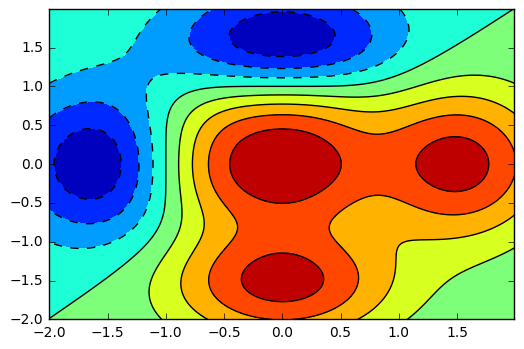

In [355]:
import matplotlib.pyplot as plt
import numpy as np
dx = 0.01; dy = 0.01
x = np.arange(-2.0,2.0,dx)
y = np.arange(-2.0,2.0,dy)
X,Y = np.meshgrid(x,y)
def f(x,y):
    return (1 - y**5 + x**5)*np.exp(-x**2-y**2)
C = plt.contour(X,Y,f(X,Y),8,colors='black')
plt.contourf(X,Y,f(X,Y),8)
#plt.clabel(C, inline=1, fontsize=10)

In [121]:
#pol = pd.read_csv(StringIO(main_path_1))